In [111]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT

In [2]:
retail=pd.read_csv("/home/nbuser/prod_cat_info.csv",sep=',')

In [3]:
retail.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [4]:
retail.columns

Index(['prod_cat_code', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat'], dtype='object')

In [5]:
retail1=pd.read_csv("/home/nbuser/Transactions.scv.csv",sep=',')

In [6]:
retail1.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type'],
      dtype='object')

In [7]:
retail2=pd.read_csv("/home/nbuser/Customer (1).csv",sep=',')

In [8]:
retail2.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [9]:
display('retail','retail1','retail2')

'retail'

'retail1'

'retail2'

In [10]:
df=pd.merge(left=retail,right=retail1,how='right',left_index=True,right_index=True)
df.head()

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type
0,1.0,Clothing,4.0,Mens,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,1.0,Clothing,1.0,Women,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,1.0,Clothing,3.0,Kids,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,2.0,Footwear,1.0,Mens,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,2.0,Footwear,3.0,Women,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [11]:
df1=pd.merge(left=df,right=retail2,how='outer',left_index=True,right_index=True)
df1.head()

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1.0,Clothing,4.0,Mens,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,268408.0,02-01-1970,M,4.0
1,1.0,Clothing,1.0,Women,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,269696.0,07-01-1970,F,8.0
2,1.0,Clothing,3.0,Kids,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268159.0,08-01-1970,F,8.0
3,2.0,Footwear,1.0,Mens,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,270181.0,10-01-1970,F,2.0
4,2.0,Footwear,3.0,Women,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268073.0,11-01-1970,M,1.0


In [12]:
#column names and data types
df1.columns

Index(['prod_cat_code_x', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat',
       'transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code_y', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [85]:
df1.shape

(23053, 18)

In [86]:
df1.size

414954

In [87]:
df1.isnull().sum()

prod_cat_code_x      23030
prod_cat             23030
prod_sub_cat_code    23030
prod_subcat          23030
transaction_id           0
cust_id                  0
tran_date                0
prod_subcat_code         0
prod_cat_code_y          0
Qty                      0
Rate                     0
Tax                      0
total_amt                0
Store_type               0
customer_Id          17406
DOB                  17406
Gender               17408
city_code            17408
dtype: int64

In [13]:
#data types and corresponding column names
df1.dtypes

prod_cat_code_x      float64
prod_cat              object
prod_sub_cat_code    float64
prod_subcat           object
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_y        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id          float64
DOB                   object
Gender                object
city_code            float64
dtype: object

In [14]:
df1.head(10)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1.0,Clothing,4.0,Mens,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,268408.0,02-01-1970,M,4.0
1,1.0,Clothing,1.0,Women,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,269696.0,07-01-1970,F,8.0
2,1.0,Clothing,3.0,Kids,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268159.0,08-01-1970,F,8.0
3,2.0,Footwear,1.0,Mens,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,270181.0,10-01-1970,F,2.0
4,2.0,Footwear,3.0,Women,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268073.0,11-01-1970,M,1.0
5,2.0,Footwear,4.0,Kids,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,273216.0,15-01-1970,F,5.0
6,3.0,Electronics,4.0,Mobiles,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,266929.0,15-01-1970,M,8.0
7,3.0,Electronics,5.0,Computers,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,275152.0,16-01-1970,M,4.0
8,3.0,Electronics,8.0,Personal Appliances,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275034.0,18-01-1970,F,4.0
9,3.0,Electronics,9.0,Cameras,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,273966.0,21-01-1970,M,8.0


In [15]:
df1.tail(10)

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
23043,NaN,NaN,NaN,NaN,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,NaN,NaN,NaN,NaN
23044,NaN,NaN,NaN,NaN,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,NaN,NaN,NaN,NaN
23045,NaN,NaN,NaN,NaN,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,NaN,NaN,NaN,NaN
23046,NaN,NaN,NaN,NaN,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,NaN,NaN,NaN,NaN
23047,NaN,NaN,NaN,NaN,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,NaN,NaN,NaN,NaN
23048,NaN,NaN,NaN,NaN,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,NaN,NaN,NaN,NaN
23049,NaN,NaN,NaN,NaN,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,NaN,NaN,NaN,NaN
23050,NaN,NaN,NaN,NaN,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,NaN,NaN,NaN,NaN
23051,NaN,NaN,NaN,NaN,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,NaN,NaN,NaN,NaN
23052,NaN,NaN,NaN,NaN,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,NaN,NaN,NaN,NaN


In [16]:
df1.min()

prod_cat_code_x                   1
prod_sub_cat_code                 1
transaction_id              3268991
cust_id                      266783
tran_date                  1/1/2012
prod_subcat_code                  1
prod_cat_code_y                   1
Qty                              -5
Rate                          -1499
Tax                            7.35
total_amt                  -8270.92
Store_type           Flagship store
customer_Id                  266783
city_code                         1
dtype: object

In [17]:
#q1 #mean # median 
df.transaction_id.describe()
    

count    2.305300e+04
mean     5.007348e+10
std      2.898194e+10
min      3.268991e+06
25%      2.493864e+10
50%      5.009313e+10
75%      7.533000e+10
max      9.998755e+10
Name: transaction_id, dtype: float64

In [18]:
a=pd.crosstab(index=df1['Store_type'], columns='count')

In [19]:
# frequency table for categorical variable
a

col_0,count
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [20]:
b=pd.crosstab(index=df1['Gender'], columns='count')

In [21]:
b

col_0,count
Gender,
F,2753
M,2892


In [22]:
c=pd.crosstab(index=df1['prod_cat'], columns='count')

In [23]:
c

col_0,count
prod_cat,
Bags,2
Books,6
Clothing,3
Electronics,5
Footwear,3
Home and kitchen,4


In [24]:
d=a=pd.crosstab(index=df1['prod_subcat'], columns='count')

In [25]:
d

col_0,count
prod_subcat,
Academic,1
Audio and video,1
Bath,1
Cameras,1
Children,1
Comics,1
Computers,1
DIY,1
Fiction,1


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3., 0., 3., 0., 5., 0., 2., 0., 6., 4.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

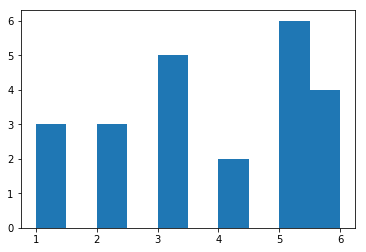

In [26]:
plt.hist(df1.prod_cat_code_x)

(array([ 496.,  446.,  464.,  411.,  360., 3413., 4335., 4336., 4349.,
        4443.]),
 array([-1.4990e+03, -1.1991e+03, -8.9920e+02, -5.9930e+02, -2.9940e+02,
         5.0000e-01,  3.0040e+02,  6.0030e+02,  9.0020e+02,  1.2001e+03,
         1.5000e+03]),
 <a list of 10 Patch objects>)

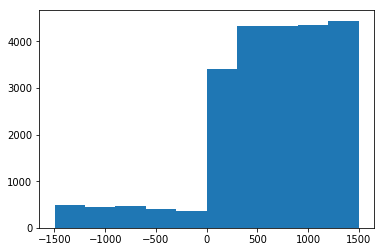

In [27]:
plt.hist(df1.Rate)

(array([4868., 5303., 3023., 2944., 1912., 1823., 1078., 1058.,  523.,
         521.]),
 array([  7.35 ,  85.365, 163.38 , 241.395, 319.41 , 397.425, 475.44 ,
        553.455, 631.47 , 709.485, 787.5  ]),
 <a list of 10 Patch objects>)

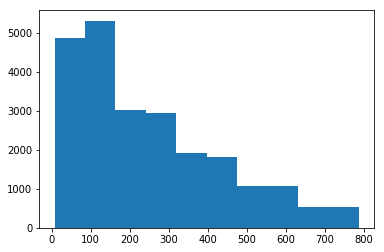

In [28]:
plt.hist(df1.Tax)

(array([ 109.,  231.,  360.,  564.,  913., 9062., 5505., 3435., 1930.,
         944.]),
 array([-8270.925 , -6615.0825, -4959.24  , -3303.3975, -1647.555 ,
            8.2875,  1664.13  ,  3319.9725,  4975.815 ,  6631.6575,
         8287.5   ]),
 <a list of 10 Patch objects>)

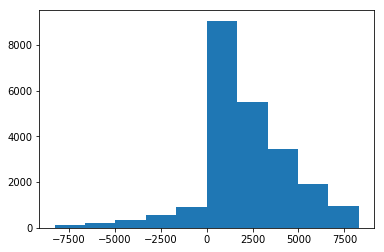

In [29]:
plt.hist(df1.total_amt)

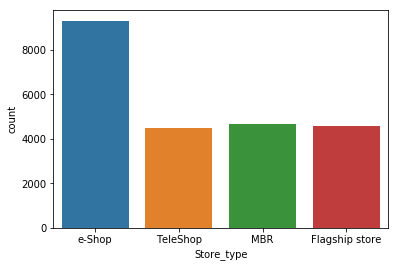

In [30]:
sns.countplot(df1.Store_type)

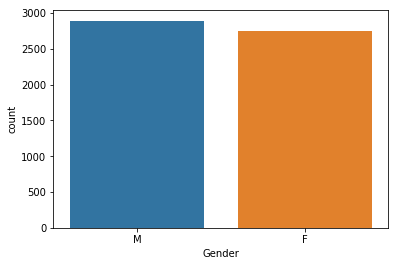

In [31]:
sns.countplot(df1.Gender)

In [32]:
df1['tran_date']

0        28-02-2014
1        27-02-2014
2        24-02-2014
3        24-02-2014
4        23-02-2014
5        23-02-2014
6        22-02-2014
7        22-02-2014
8        22-02-2014
9        21-02-2014
10       20-02-2014
11       20-02-2014
12       20-02-2014
13       20-02-2014
14       20-02-2014
15       20-02-2014
16       20-02-2014
17       20-02-2014
18       20-02-2014
19       20-02-2014
20       20-02-2014
21       20-02-2014
22       20-02-2014
23       20-02-2014
24       20-02-2014
25       20-02-2014
26       20-02-2014
27       20-02-2014
28       20-02-2014
29       20-02-2014
            ...    
23023    26-01-2011
23024    26-01-2011
23025    26-01-2011
23026    26-01-2011
23027    26-01-2011
23028    26-01-2011
23029    26-01-2011
23030    26-01-2011
23031    26-01-2011
23032    26-01-2011
23033    25-01-2011
23034    25-01-2011
23035    25-01-2011
23036    25-01-2011
23037    25-01-2011
23038    25-01-2011
23039    25-01-2011
23040    25-01-2011
23041    25-01-2011


In [33]:
df1.tran_date.describe()

count          23053
unique          1129
top       13-07-2011
freq              35
Name: tran_date, dtype: object

In [34]:
df1.head()

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,1.0,Clothing,4.0,Mens,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,268408.0,02-01-1970,M,4.0
1,1.0,Clothing,1.0,Women,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,269696.0,07-01-1970,F,8.0
2,1.0,Clothing,3.0,Kids,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268159.0,08-01-1970,F,8.0
3,2.0,Footwear,1.0,Mens,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,270181.0,10-01-1970,F,2.0
4,2.0,Footwear,3.0,Women,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,268073.0,11-01-1970,M,1.0


In [35]:
df1.tail()

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
23048,NaN,NaN,NaN,NaN,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,NaN,NaN,NaN,NaN
23049,NaN,NaN,NaN,NaN,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,NaN,NaN,NaN,NaN
23050,NaN,NaN,NaN,NaN,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,NaN,NaN,NaN,NaN
23051,NaN,NaN,NaN,NaN,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,NaN,NaN,NaN,NaN
23052,NaN,NaN,NaN,NaN,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,NaN,NaN,NaN,NaN


In [36]:
#time period of available transaction data starts from 25-01-2011 to 29-02-2014

In [37]:
# count of negative values in transaction amount
sum(i<0 for i in retail1.total_amt)

2177

AttributeError: module 'seaborn' has no attribute 'plot'

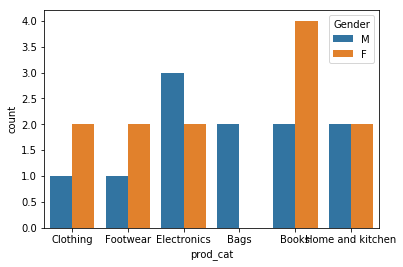

In [38]:
sns.countplot(x='prod_cat',hue='Gender',data=df1)
sns.plot.show()

In [ ]:
# Clothing,footwear and books were most popular among females than males

In [39]:
df2=pd.crosstab(index=df1['city_code'],columns=['cust_id'])

In [40]:
df2

col_0,cust_id
city_code,
1.0,551
2.0,564
3.0,595
4.0,582
5.0,586
6.0,526
7.0,575
8.0,562
9.0,546


In [41]:
#city code 3.0 has the maximum customers and percentage of customers from that city
df3=[i%100 for i in df2['cust_id']]


In [42]:
df3

[51, 64, 95, 82, 86, 26, 75, 62, 46, 58]

In [ ]:
# so the percetage of customers in city code 3.0 is 95%

In [43]:
df4=pd.crosstab(index=df1['Store_type'],columns='count')

In [44]:
df4

col_0,count
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [ ]:
#e-shop has the maximum value 

In [45]:
df6=pd.crosstab(index=df1['Qty'],columns='count')

In [46]:
df6

col_0,count
Qty,
-5,457
-4,458
-3,405
-2,438
-1,419
1,4214
2,4123
3,4174
4,4106


In [47]:
df7=df1.groupby(['Store_type',[i>0 for i in df1.Qty]]).size()

In [48]:
df7

Store_type           
Flagship store  False     432
                True     4145
MBR             False     451
                True     4210
TeleShop        False     412
                True     4092
e-Shop          False     882
                True     8429
dtype: int64

In [ ]:
#e shop has the most value and quantity 

In [49]:
df8=df1.groupby(['Store_type'=='Flagship store,'Electronics']).sum()

SyntaxError: invalid syntax (<ipython-input-49-6d1ca6dec5f6>, line 1)

In [73]:
df9=df1[(df1['Store_type']== 'Flagship store')]

In [74]:
df9

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
17,5.0,Books,3.0,Comics,25963520987,274829,20-02-2014,4,4,3,502,158.130,1664.130,Flagship store,268275.0,01-02-1970,F,7.0
29,NaN,NaN,NaN,NaN,99581788104,267466,20-02-2014,3,2,1,96,10.080,106.080,Flagship store,272359.0,19-02-1970,M,4.0
39,NaN,NaN,NaN,NaN,63407734630,271322,19-02-2014,3,2,5,1360,714.000,7514.000,Flagship store,274592.0,08-03-1970,M,5.0
41,NaN,NaN,NaN,NaN,82750983847,267544,19-02-2014,3,5,1,805,84.525,889.525,Flagship store,266895.0,12-03-1970,M,4.0
42,NaN,NaN,NaN,NaN,67328698675,268755,19-02-2014,3,2,1,1018,106.890,1124.890,Flagship store,274360.0,14-03-1970,M,5.0
46,NaN,NaN,NaN,NaN,72427583709,268129,19-02-2014,4,4,1,885,92.925,977.925,Flagship store,267379.0,21-03-1970,F,2.0
48,NaN,NaN,NaN,NaN,7313351894,267568,18-02-2014,2,6,4,481,202.020,2126.020,Flagship store,273106.0,23-03-1970,F,2.0
49,NaN,NaN,NaN,NaN,37745642681,267098,18-02-2014,1,2,1,109,11.445,120.445,Flagship store,271935.0,26-03-1970,M,5.0
52,NaN,NaN,NaN,NaN,58886320392,268715,18-02-2014,10,6,2,768,161.280,1697.280,Flagship store,266969.0,28-03-1970,M,2.0
53,NaN,NaN,NaN,NaN,53081075361,273250,18-02-2014,11,6,5,1345,706.125,7431.125,Flagship store,273871.0,29-03-1970,M,7.0


In [75]:
df9[(df9['prod_cat']=='clothing')]

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code


In [79]:
pd.crosstab(index=df9['prod_cat'],columns='count')

col_0,count
prod_cat,
Books,1


In [80]:
#in flagship stores there is no electronics and clothing category

In [82]:
df1[(df1['Gender']=='M') & (df1['prod_cat']=='electronics')]
## there is no sufficient data



,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code


In [90]:
f=pd.crosstab(index=df1['customer_Id'>0], columns='count')

TypeError: '>' not supported between instances of 'str' and 'int'

In [91]:
f

col_0,count
customer_Id,
266783.0,1
266784.0,1
266785.0,1
266788.0,1
266794.0,1
266799.0,1
266803.0,1
266804.0,1
266805.0,1


In [105]:
#df7=df1.groupby(['Store_type',[i>0 for i in df1.Qty]]).size()
z=df1.groupby(['cust_id',[i>0 for i in df1.total_amt]]).size()

In [107]:
z.sum()
# transaction amount not in negative

23053

In [110]:
p=[i>25 for i in df1['Age']]

KeyError: 'Age'

In [113]:
#now = datetime.now()
#df1['age'] = now - df1['dob']

now=DT.now()
df55['age']=now-df1['DOB']

AttributeError: module 'datetime' has no attribute 'now'

In [130]:
df09=df1.sort_values('DOB')


In [131]:
s

,prod_cat_code_x,prod_cat,prod_sub_cat_code,prod_subcat,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_y,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
475,NaN,NaN,NaN,NaN,22618767602,272534,27-01-2014,4,4,3,519,163.485,1720.485,e-Shop,272982.0,01-01-1972,F,10.0
1943,NaN,NaN,NaN,NaN,24129475595,274824,18-11-2013,1,2,5,628,329.700,3469.700,TeleShop,270066.0,01-01-1978,F,2.0
2178,NaN,NaN,NaN,NaN,92777957905,271862,7/11/2013,4,3,-2,-1151,241.710,-2543.710,e-Shop,267237.0,01-01-1979,M,8.0
2443,NaN,NaN,NaN,NaN,31058355097,272252,24-10-2013,9,3,-3,-479,150.885,-1587.885,TeleShop,270004.0,01-01-1980,M,7.0
2442,NaN,NaN,NaN,NaN,78547650287,273906,25-10-2013,3,1,1,475,49.875,524.875,e-Shop,271648.0,01-01-1980,F,1.0
2441,NaN,NaN,NaN,NaN,74346774200,275175,25-10-2013,1,4,3,881,277.515,2920.515,MBR,272430.0,01-01-1980,F,6.0
2702,NaN,NaN,NaN,NaN,63254279195,273740,13-10-2013,10,6,2,1194,250.740,2638.740,e-Shop,270362.0,01-01-1981,M,6.0
2937,NaN,NaN,NaN,NaN,63960481774,269245,2/10/2013,2,6,5,1143,600.075,6315.075,e-Shop,270592.0,01-01-1982,F,6.0
3192,NaN,NaN,NaN,NaN,31408259430,268385,20-09-2013,2,6,5,837,439.425,4624.425,TeleShop,269807.0,01-01-1983,M,3.0
3193,NaN,NaN,NaN,NaN,48662282932,271643,20-09-2013,2,6,1,1237,129.885,1366.885,Flagship store,267333.0,01-01-1983,F,9.0


In [135]:
df09['DOB'].value_counts()

27-12-1988    7
17-09-1982    5
20-03-1972    5
01-08-1975    5
23-03-1982    5
26-03-1987    4
09-06-1970    4
17-07-1975    4
28-03-1988    4
10-06-1983    4
18-11-1991    4
05-12-1992    4
20-04-1980    4
08-03-1983    4
15-07-1984    4
11-11-1987    4
27-11-1991    4
08-06-1981    4
19-05-1988    4
08-07-1991    4
05-12-1975    4
07-05-1975    4
20-05-1975    4
25-02-1974    4
20-09-1992    4
23-05-1984    4
15-03-1987    4
04-12-1992    4
08-11-1990    4
26-02-1982    4
             ..
14-10-1980    1
04-02-1990    1
05-07-1988    1
19-07-1984    1
29-12-1974    1
26-06-1985    1
06-07-1975    1
16-05-1979    1
13-09-1987    1
12-11-1972    1
21-03-1987    1
21-02-1971    1
22-07-1974    1
19-11-1980    1
15-08-1981    1
16-03-1990    1
14-10-1975    1
02-11-1992    1
11-04-1991    1
20-03-1986    1
05-07-1972    1
11-02-1974    1
12-01-1989    1
09-10-1990    1
05-11-1984    1
28-10-1986    1
18-04-1977    1
13-08-1992    1
04-02-1980    1
09-12-1971    1
Name: DOB, Length: 4056,

In [136]:
df1[(df1['DOB']>01-01-1985) & (df1['DOB']<31-12-1995)]

SyntaxError: invalid token (<ipython-input-136-cb56ec17fd68>, line 1)